## **Convolutions**

Also called filters, masks, kernels. Are matrices that are meant to modify an image and convert them to smaller versions with specific changes: blurring, downsample, edge detection, highlight colors, focus on specific parts of image.

Calculations for convolutions involve multiplication and summation.

In [1]:
def Conv2D(image, kernel):
  input_height = image.shape[0]
  input_width = image.shape[1]
  kernel_height = kernel.shape[0]
  kernel_width = kernel.shape[1]

  output_height = input_height - kernel_height + 1
  output_width = input_width - kernel_width + 1

  output_image = np.zeros((output_height, output_width))
  for i in range(0, output_height):
    for j in range(0, output_width):
      for ii in range(0, kernel_height):
        for jj in range(0, kernel_width):
          output_image[i,j] += image[i+ii, j+jj] * kernel[ii,jj]

  return output_image

In [2]:
## Create an image with random pixels
import numpy as np
image = np.random.rand(4,4)
image

array([[0.32679785, 0.3109273 , 0.22474994, 0.32727833],
       [0.72575726, 0.09694862, 0.10857558, 0.82783982],
       [0.77263284, 0.90532678, 0.60096444, 0.22558917],
       [0.49776162, 0.03041578, 0.40237431, 0.34862554]])

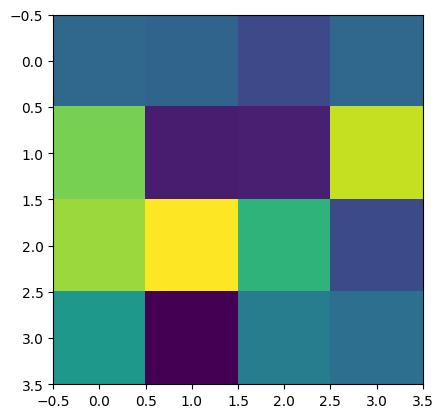

In [3]:
## matplotlib can be used to plot
import matplotlib.pyplot as plt
plt.imshow(image)

In [5]:
## filter of 1s
filter = np.ones((2,2))
filter

array([[1., 1.],
       [1., 1.]])

In [6]:
image

array([[0.32679785, 0.3109273 , 0.22474994, 0.32727833],
       [0.72575726, 0.09694862, 0.10857558, 0.82783982],
       [0.77263284, 0.90532678, 0.60096444, 0.22558917],
       [0.49776162, 0.03041578, 0.40237431, 0.34862554]])

In [7]:
## resulting image
## size: image(4x4)  filter (2x2)  = (4-2+1) x (4-2+1)
## size of resulting image: 3x3
## calculate the manually the top left pixel result
0.32679785+0.3109273+0.72575726+0.09694862

1.46043103

In [8]:
## the resulting image has information about the sorrounding pixels of the original image

In [9]:
resulting_image = Conv2D(image, filter)
resulting_image

array([[1.46043103, 0.74120145, 1.48844368],
       [2.50066551, 1.71181543, 1.76296901],
       [2.20613703, 1.93908131, 1.57755346]])

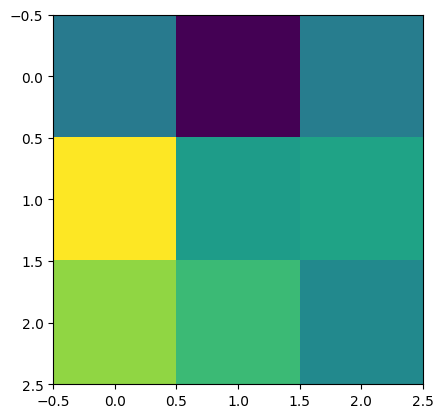

In [10]:
plt.imshow(resulting_image)

In [11]:
## to read an image JPEG, PIC, JPG
from matplotlib.image import imread
car_image = imread('/content/car_image.jpeg')

In [13]:
car_image.shape

(1200, 1800, 3)

In [15]:
## in order a fit an NN, you want to make all images the same size
## tensorflow has functions that can make all images read the (228, 228)
## smaller images that keep the idea should be used.
## using a feed-forward architecture
1200* 1800* 3 ## too much so we downsample to about 228, 228

6480000

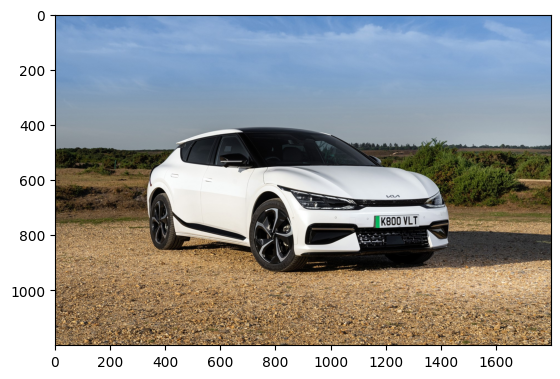

In [16]:
## to plot an image
plt.imshow(car_image)

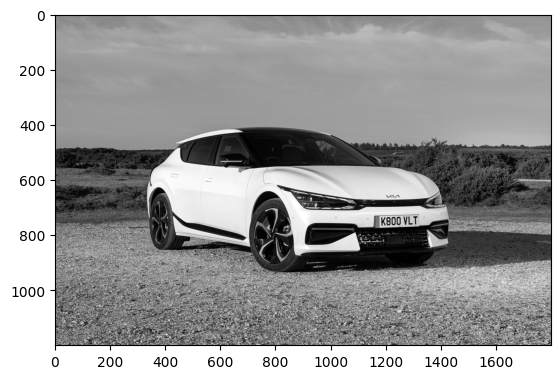

In [17]:
## grayscale image
car_image_gray = np.dot(car_image, [0.2989, 0.5870, 0.1140])
plt.imshow(car_image_gray, cmap='gray')

In [18]:
car_image_gray

array([[130.8057, 130.8057, 130.8057, ..., 143.3206, 143.3206, 143.3206],
       [129.8058, 129.8058, 129.8058, ..., 143.3206, 143.3206, 143.3206],
       [129.8058, 130.8057, 130.8057, ..., 143.3206, 144.3205, 144.3205],
       ...,
       [177.1725, 179.6561, 181.0258, ..., 203.9418, 235.9385, 234.5365],
       [153.9037, 168.2721, 176.1142, ..., 160.7935, 184.862 , 208.8596],
       [133.6777, 170.0439, 123.3753, ..., 123.9004, 118.7977, 129.7966]])

In [19]:
sharpen_filter = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])
sharpen_filter

array([[ 0, -1,  0],
       [-1,  5, -1],
       [ 0, -1,  0]])

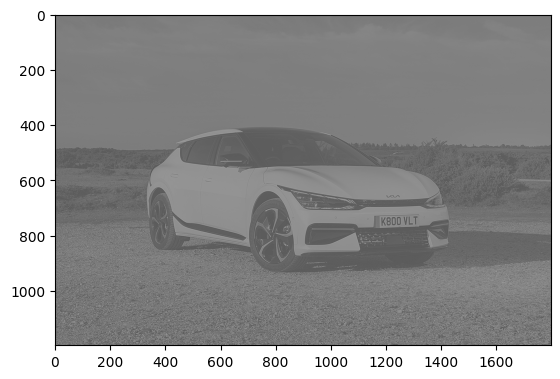

In [21]:
## the resulting image 1198 x 1798
sharpened_image = Conv2D(car_image_gray, sharpen_filter)
plt.imshow(sharpened_image, cmap='gray')

#### **Pooling functions**

Meant to downsample image (make smaller). The most common pooling functions are the MaxPooling (takes the max), AveragePooling, MinPooling.

In [22]:
# prompt: create a max pooling function

def MaxPooling2D(image, pool_size):
  input_height = image.shape[0]
  input_width = image.shape[1]
  pool_height = pool_size[0]
  pool_width = pool_size[1]

  output_height = input_height // pool_height
  output_width = input_width // pool_width

  output_image = np.zeros((output_height, output_width))
  for i in range(0, output_height):
    for j in range(0, output_width):
      region = image[i * pool_height:(i + 1) * pool_height, j * pool_width:(j + 1) * pool_width]
      output_image[i, j] = np.max(region)

  return output_image

In [23]:
image

array([[0.32679785, 0.3109273 , 0.22474994, 0.32727833],
       [0.72575726, 0.09694862, 0.10857558, 0.82783982],
       [0.77263284, 0.90532678, 0.60096444, 0.22558917],
       [0.49776162, 0.03041578, 0.40237431, 0.34862554]])

In [24]:
MaxPooling2D(image, (2,2))

array([[0.72575726, 0.82783982],
       [0.90532678, 0.60096444]])

In [25]:
## STRIDE refers to by how many pixels a convolution or pooling function moves
## (2 right, 2 down) the next convolution is calculated by moving 2 pixel right, 2 pixels down
## (2,2) pooling is the most way to move over the image
## (2,2) pooling reduces the image faster

## the resulting image size (4 - 2) / stride + 1
## image (4x4)  pooling filter (2x2)  ---- resulting image (4-2)/2 + 1 (2x2)

## **How to fit a CNN using Tensorflow**

We will use a Conv2D, Pooling2D. We call these functions 2D because they work on matrices (rows by cols). There are Conv3D that work for video data.

In [26]:
## load the cifar10 data
from tensorflow.keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step


In [27]:
## standardize images
X_train = X_train / 255.0
X_test = X_test / 255.0

In [28]:
X_train.shape

(50000, 32, 32, 3)

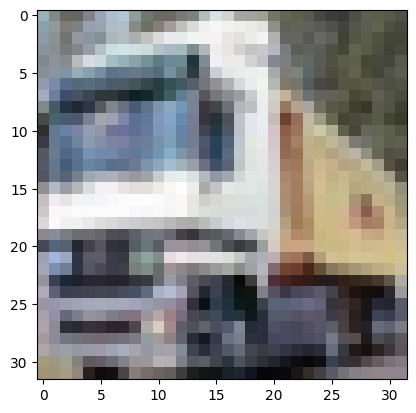

In [30]:
plt.imshow(X_train[1])

In [39]:
## Create the CNN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input

## Architecture
model = Sequential()
model.add(Input(shape=(32,32,3)))
## 8 filters, (3x3) - ReLu - Stride (1,1)
model.add(Conv2D(8, kernel_size = (3,3), activation='relu'))
## MaxPooling (2x2) - stride = (2,2)
model.add(MaxPooling2D(pool_size=(2,2)))
## 32 filters (3x3) - ReLu
model.add(Conv2D(32, kernel_size=(3,3), activation='relu'))
## MaxPooling
model.add(MaxPooling2D(pool_size=(2,2)))
## 64 filters (3x3) - ReLu
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
## resulting images of ONLY 4x4

## Flatten
model.add(Flatten())

## Dense Layers
model.add(Dense(64, activation='relu'))
## output layer
model.add(Dense(10, activation='softmax'))

In [38]:
## model summary
## image 32x32 kernel 3x3: resulting image: 32-3+1, 32-3+1
## 3x3x3+1 *32
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 30, 30, 8)           │             224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 15, 15, 8)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 13, 13, 32)          │           2,336 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 6, 6, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 4, 4, 64)            │          18,496 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 21,056 (82.25 KB)

 Trainable params: 21,056 (82.25 KB)

 Non-trainable params: 0 (0.00 B)